* **가중치 시각화**는 합성곱 층의 가중치를 이미지로 출력하는 것을 말한다. 합성곱 신경망은 주로 이미지를 다루기 때문에 가중치가 시각적인 패턴을 학습하는지 알아볼 수 있다. 
* **특성 맵 시각화**는 합성곱 층의 활성화 출력을 이미지로 그리는 것을 말한다. 가중치 시각화와 함께 비교하여 각 필터가 이미지의 어떤 부분을 활성화시키는지 확인할 수 있다. 
* **함수형 api**는 케라스에서 신경망 모델을 만드는 방법 중 하나이다. Model 클래스에 모델의 입력과 출력을 지정한다. 전형적으로 입력은 input() 함수를 사용하여 정의하고 출력은 마지막 층의 출력으로 정의한다. 

# Tensorflow

* **Model**은 케라스 모델을 만드는 클래스이다. 
  * 첫 번째 매개변수인 inputs에 모델의 입력 또는 입력의 리스트를 지정한다. 
  * 두 번째 매개변수인 outputs에 모델의 출력 또는 출력의 리스트를 지정한다. 
  * name 매개변수에 모델의 이름을 지정할 수 있다. 

In [1]:
from tensorflow import keras

model = keras.models.load_model('best-cnn-model.h5')

In [2]:
model.layers

In [3]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [4]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.024465429 0.24266341


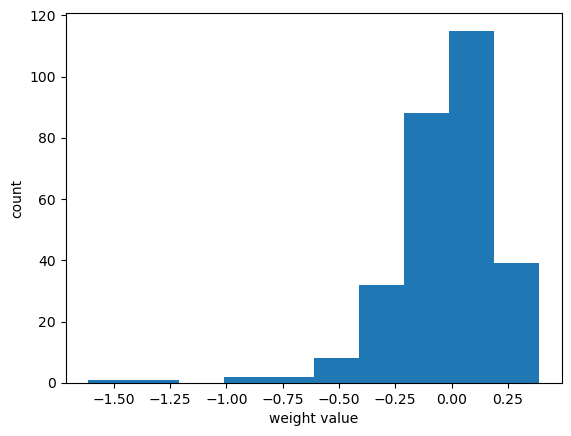

In [5]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight value')
plt.ylabel('count')
plt.show()

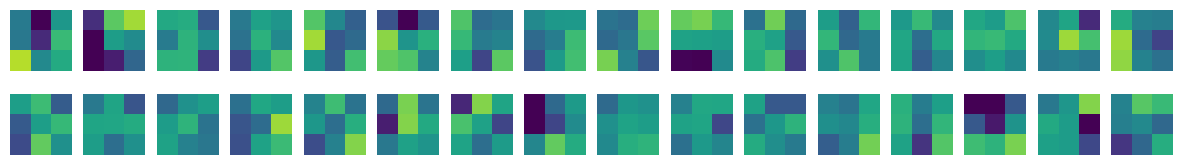

In [6]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
        
plt.show()

In [7]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

In [8]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [9]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())  

0.00023037661 0.08097838


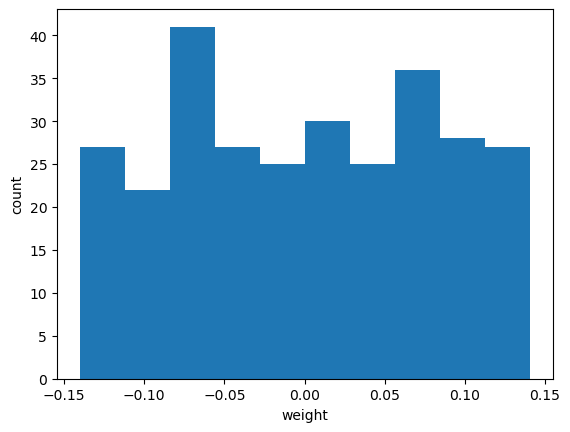

In [10]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

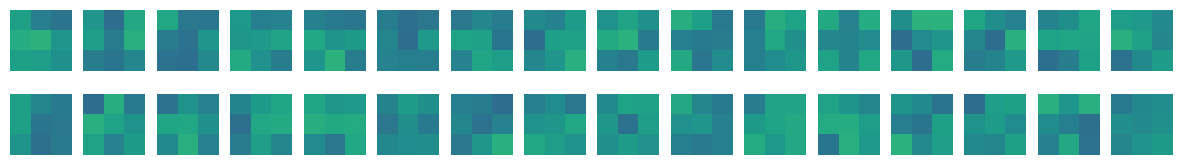

In [11]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
        
plt.show()

In [12]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_2_input'), name='conv2d_2_input', description="created by layer 'conv2d_2_input'")


In [13]:
conv_acti = keras.models.Model(model.input, model.layers[0].output)

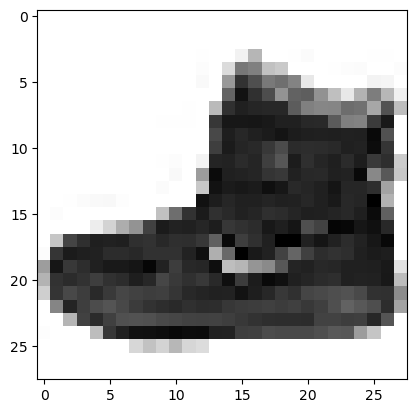

In [14]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [15]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 2s 2s/step


In [16]:
print(feature_maps.shape)

(1, 28, 28, 32)


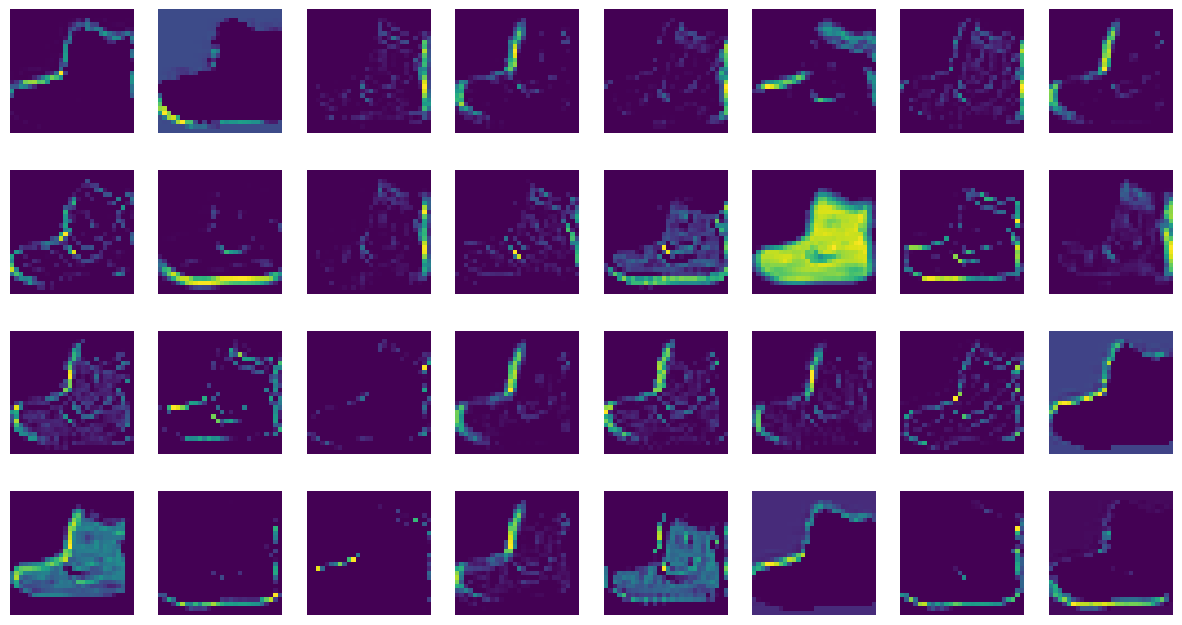

In [17]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
        axs[i, j].axis('off')
        
plt.show()

In [18]:
conv2_acti = keras.models.Model(model.input, model.layers[2].output)

In [19]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0

feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 96ms/step


In [20]:
print(feature_maps.shape)

(1, 14, 14, 64)


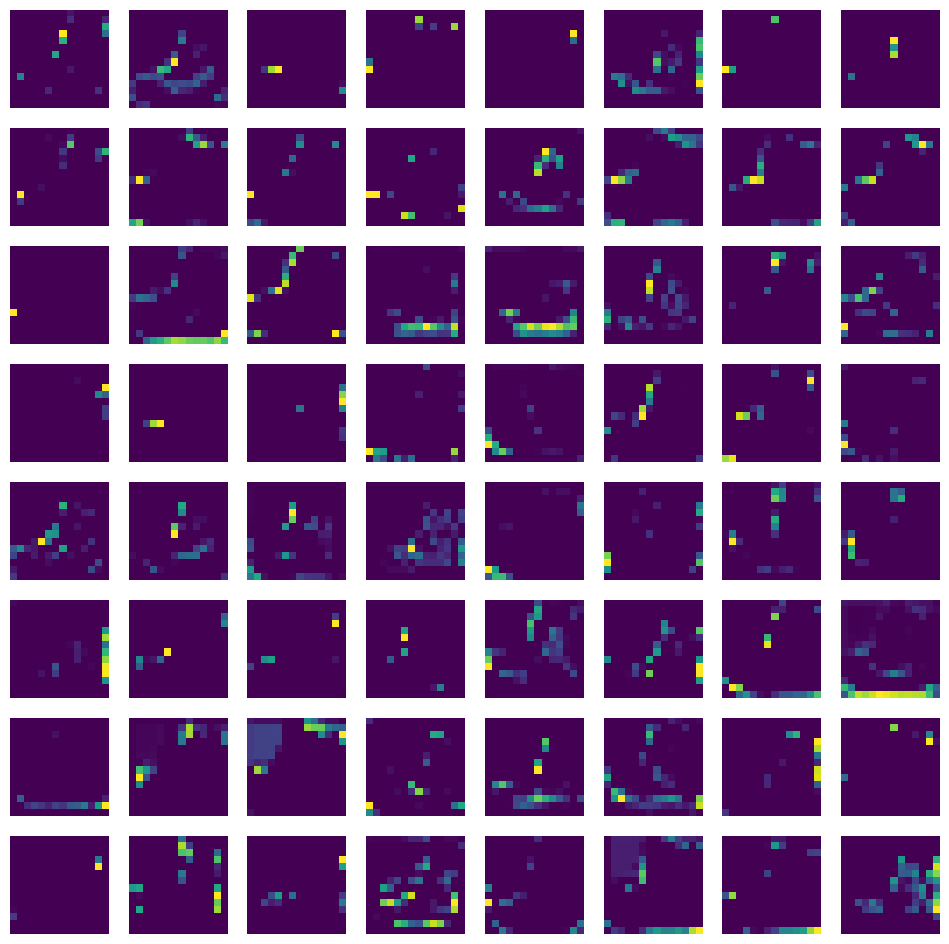

In [21]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
        axs[i, j].axis('off')
        
plt.show()